 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Assign the whale_returns path
whale_path = Path("Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [4]:
# Sorting index by ascending and manually verifying that index has been sorted 
whale_returns_df.sort_index(ascending=True, inplace=True)
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [5]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

In [7]:
# Verify there are no more nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Assign the algo_path path
algo_path = Path("Resources/algo_returns.csv")

In [9]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [10]:
# Sorting index by ascending and manually verifying that index has been sorted 
algo_returns_df.sort_index(ascending=True, inplace=True)
algo_returns_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [11]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

In [13]:
# Verify there are no more nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Assign the SP60_path path
sp60_path = Path("Resources/sp_tsx_history.csv")

In [15]:
# Reading S&P TSX 60 Closing Prices
sp60_close_df = pd.read_csv(sp60_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [16]:
# Sorting index by ascending and manually verifying that index has been sorted 
sp60_close_df.sort_index(ascending=True, inplace=True)
sp60_close_df.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [17]:
# Check Data Types
sp60_close_df.dtypes

Close    object
dtype: object

In [18]:
# Fix Data Types
sp60_close_df["Close"] = sp60_close_df["Close"].str.replace("$","", regex=True).replace(",","",regex=True)
sp60_close_df["Close"] = sp60_close_df["Close"].astype(float)

In [19]:
# Calculate Daily Returns
sp60_dailyreturns = sp60_close_df.pct_change()
sp60_dailyreturns

Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
...              ...
2019-12-20  0.003188
2019-12-23  0.000600
2019-12-24  0.003003
2019-12-27 -0.000695
2019-12-30 -0.004057

[1818 rows x 1 columns]

In [20]:
# Count nulls
sp60_dailyreturns.isnull().sum()

Close    1
dtype: int64

In [21]:
# Drop nulls & verify there are no more nulls
sp60_dailyreturns.dropna(inplace=True)
sp60_dailyreturns.isnull().sum()

Close    0
dtype: int64

In [22]:
# Rename `Close` Column to be specific to this portfolio.
sp60_dailyreturns = sp60_dailyreturns.rename(columns={"Close":"S&P TSX"})
sp60_dailyreturns.head()

S&P TSX
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp60_dailyreturns], axis="columns", join="inner")
portfolio_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P TSX  
Date                            
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.002416 -0.003371  
2015-03-05  0.004323  0.001344  
2015-03-06 -0.011460 -0.009972  
2015-03-09  0.001303 -0.006555

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date', ylabel='Daily Returns'>

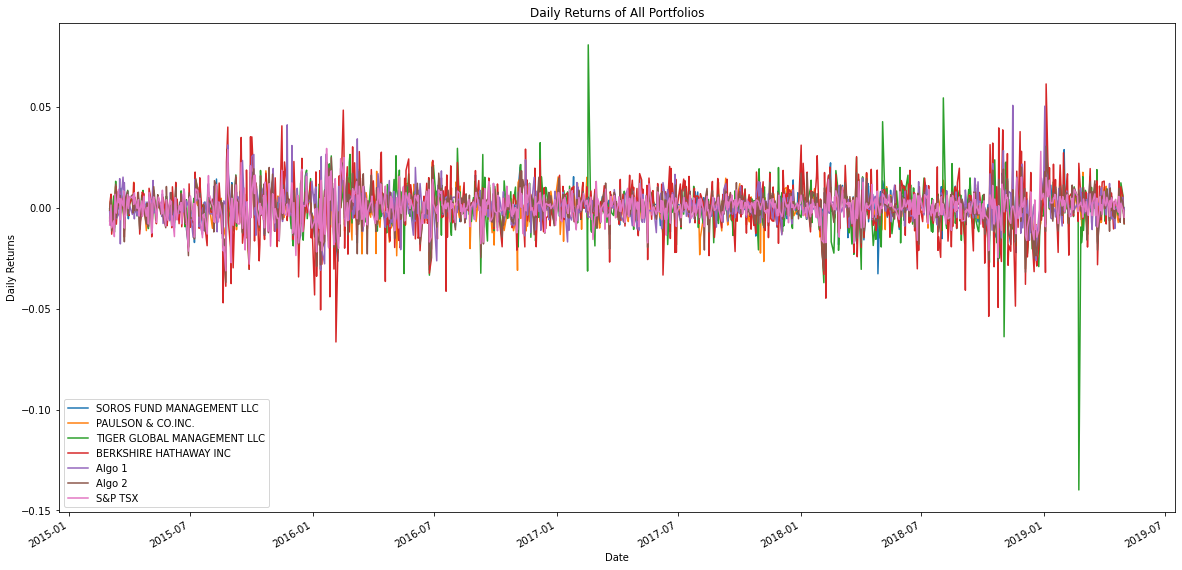

In [24]:
# Plot daily returns of all portfolios
portfolio_returns_df.plot(figsize=(20, 10), title="Daily Returns of All Portfolios", ylabel = "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Daily Returns of All Portfolios'}, xlabel='Date', ylabel='Cumulative Daily Returns'>

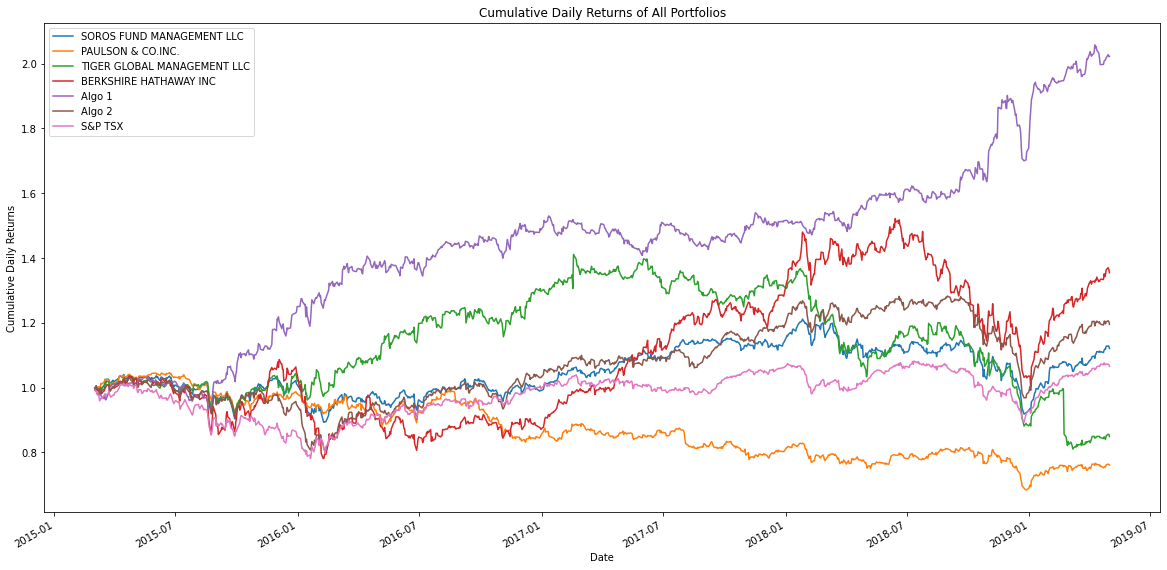

In [25]:
# Calculate cumulative returns of all portfolios
cumulative_returns_all = (1 + portfolio_returns_df).cumprod()

# Plot cumulative returns
cumulative_returns_all.plot(figsize=(20, 10), title="Cumulative Daily Returns of All Portfolios", ylabel = "Cumulative Daily Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot of Each Portfolio'}>

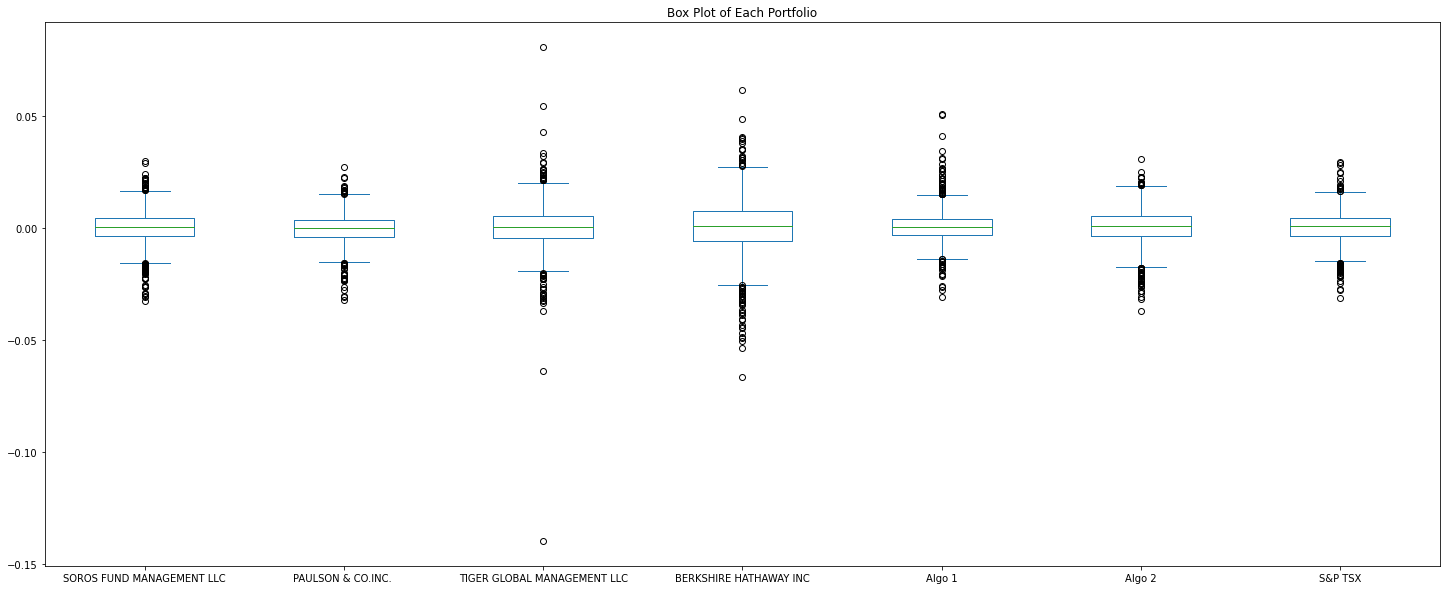

In [26]:
# Box plot to visually show risk
portfolio_returns_df.plot.box(figsize=(25,10), title = "Box Plot of Each Portfolio")

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios - All Portfolios
portfolio_returns_df.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [28]:
# Initialise a dictionary to hold key value pairs of portfolio and corresponding daily standard deviations
portfolio_returns_dict = {}

# Loop through the portfolios and append to dictionary
for column in portfolio_returns_df.columns:
    key, value = column, portfolio_returns_df[column].std()
    portfolio_returns_dict[key] = value

# Calculate  the daily standard deviation of S&P TSX 60
sptsx60_std = portfolio_returns_df["S&P TSX"].std()

# Print the S&P TSX standard deviation as a benchmark
print (f"The S&P TSX has an std of {round(sptsx60_std, 6)}")

# Determine which portfolios are riskier than the S&P TSX 60
for key, value in portfolio_returns_dict.items():
    if value > sptsx60_std:
        print (f"{key} with an std of {round(float(value), 6)} is a riskier portfolio than the S&P TSX")



The S&P TSX has an std of 0.007034
SOROS FUND MANAGEMENT LLC with an std of 0.007828 is a riskier portfolio than the S&P TSX
TIGER GLOBAL MANAGEMENT LLC with an std of 0.010883 is a riskier portfolio than the S&P TSX
BERKSHIRE HATHAWAY INC with an std of 0.012826 is a riskier portfolio than the S&P TSX
Algo 1 with an std of 0.007589 is a riskier portfolio than the S&P TSX
Algo 2 with an std of 0.008326 is a riskier portfolio than the S&P TSX


### Calculate the Annualized Standard Deviation

In [29]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = portfolio_returns_df.std() * np.sqrt(252)
ann_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Day Standard Deviation'}, xlabel='Date', ylabel='Rolling STD'>

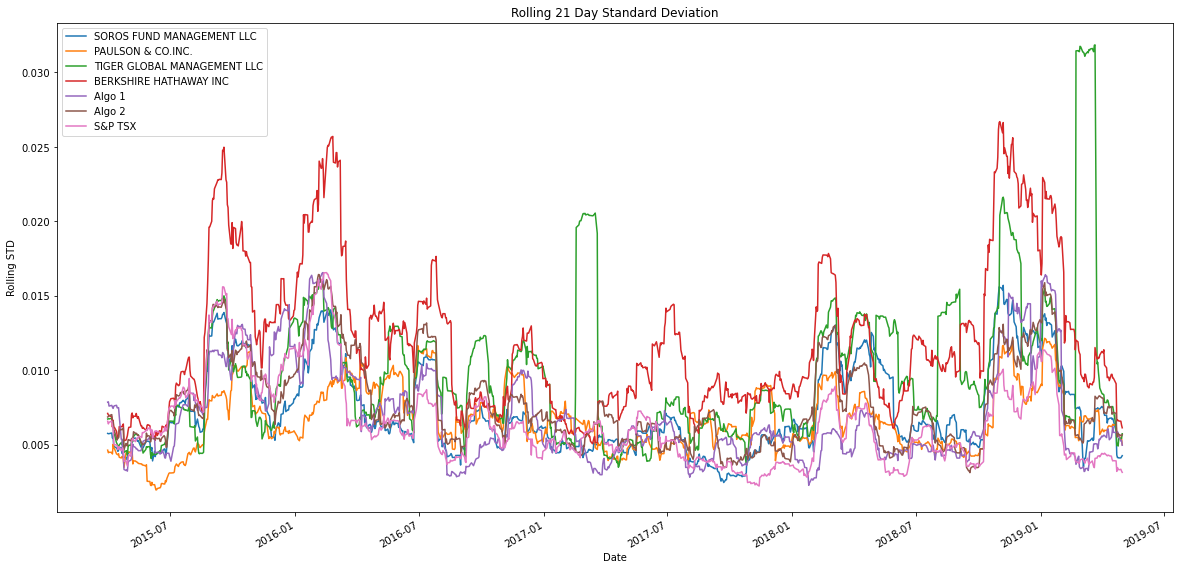

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_returns_df_21 = portfolio_returns_df.rolling(window=21).std()
portfolio_returns_df_21.tail()

# Plot the rolling standard deviation
portfolio_returns_df_21.plot(figsize=(20,10), title = "Rolling 21 Day Standard Deviation", ylabel = "Rolling STD")

### Calculate and plot the correlation

In [31]:
# Calculate the correlation
correlation = portfolio_returns_df.corr()

# Display de correlation matrix
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
S&P TSX                                       0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2                                          0.506689   
S&P TSX                                         0.440583   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.750181  0.313795  0.826667   
PAULSON & CO.INC.                          0.540033  0.266363  0.674015   
TIGER GLOBAL MANAGEMENT LLC                0.423524  0.161236  0.506689   
BERKSHIRE HATHAWAY INC                     1.000000  0.289378  0.684609   
Algo 1                                     0.289378  1.000000  0.285455   
Algo 2                                     0.684609  0.285455  1.000000   
S&P TSX                                    0.557250  0.310276  0.737370   

                              S&P TSX  
SOROS FUND MANAGEMENT LLC    0.673930  
PAULSON & CO.INC.            0.486511  
TIGER GLOBAL MANAGEMENT LLC  0.440583  
BERKSHIRE HATHAWAY INC       0.557250  
Algo 1                       0.310276  
Algo 2                       0.737370  
S&P TSX                      1.000000

<AxesSubplot:>

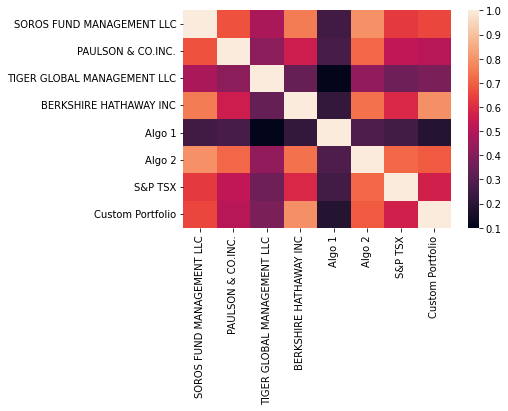

In [58]:
# Plot correlation using a seaborn heatmap
sns.heatmap(correlation, vmin=0.1, vmax=1)

## Analysis: 
Reviewing the correlation heatmap, the portfolios that most closesely mimic the S&P TSX are Soros Fund Management and Algo 2

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Soros Fund Management LLC vs S&P TSX'}, xlabel='Date'>

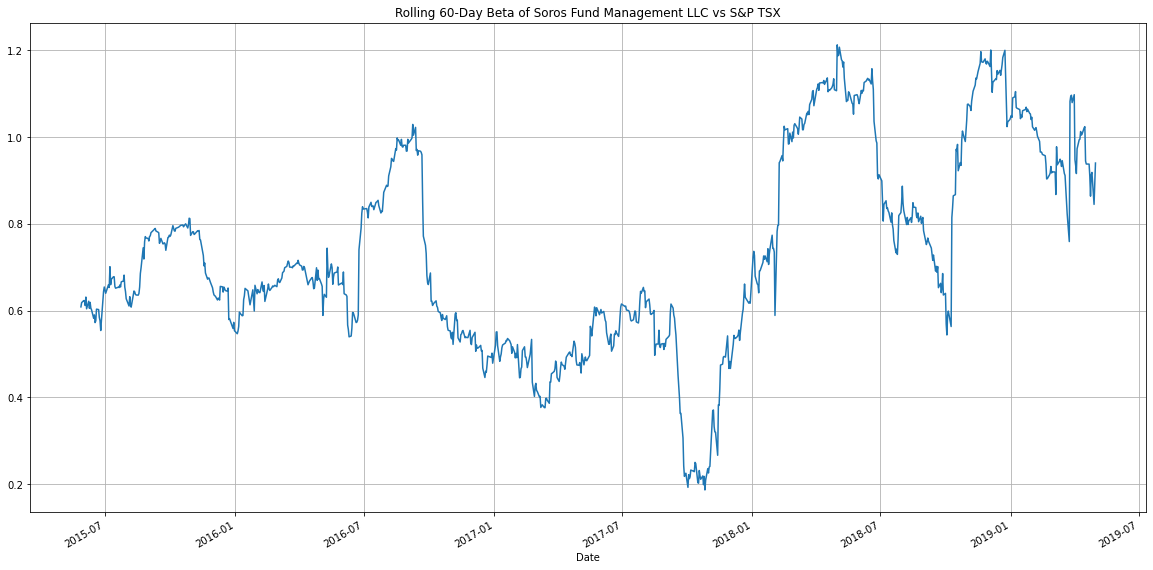

In [33]:
# Calculate covariance of a single portfolio - Soros Fund Management LLC vs. S&P 60TSX
soros_covariance = portfolio_returns_df["SOROS FUND MANAGEMENT LLC"].cov(portfolio_returns_df["S&P TSX"])

# Calculate 60-day rolling  covariance of a single portfolio - Soros Fund Management LLC vs. S&P 60TSX
soros_60day_covariance = portfolio_returns_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(portfolio_returns_df["S&P TSX"])

# Calculate variance of a single portfolio - Soros Fund Management LLC vs. S&P 60TSX
soros_variance = portfolio_returns_df["SOROS FUND MANAGEMENT LLC"].var

# Calculate 60-day rolling  variance of a single portfolio - Soros Fund Management LLC vs. S&P 60TSX
soros_60day_variance = portfolio_returns_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).var

# Calculate variance of S&P TSX
sp_variance = portfolio_returns_df["S&P TSX"].var()

# Calculate 60-day rolling variance of S&P TSX
sp_rolling_variance = portfolio_returns_df["S&P TSX"].rolling(window=60).var()

# Computing beta and 60-day rolling beta of Soros Fund Management LLC 
soros_beta = soros_covariance / sp_variance
soros_rolling_beta = soros_60day_covariance / sp_rolling_variance

# Plot the 60-day rolling beta
soros_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros Fund Management LLC vs S&P TSX', grid=True)


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [34]:
# Use `ewm` to calculate the rolling window
portfolio_returns_df_ewm = portfolio_returns_df.ewm(halflife=21).mean()

<AxesSubplot:title={'center':'Exponentially Weighted Moving Average - 21 day half-life'}, xlabel='Date'>

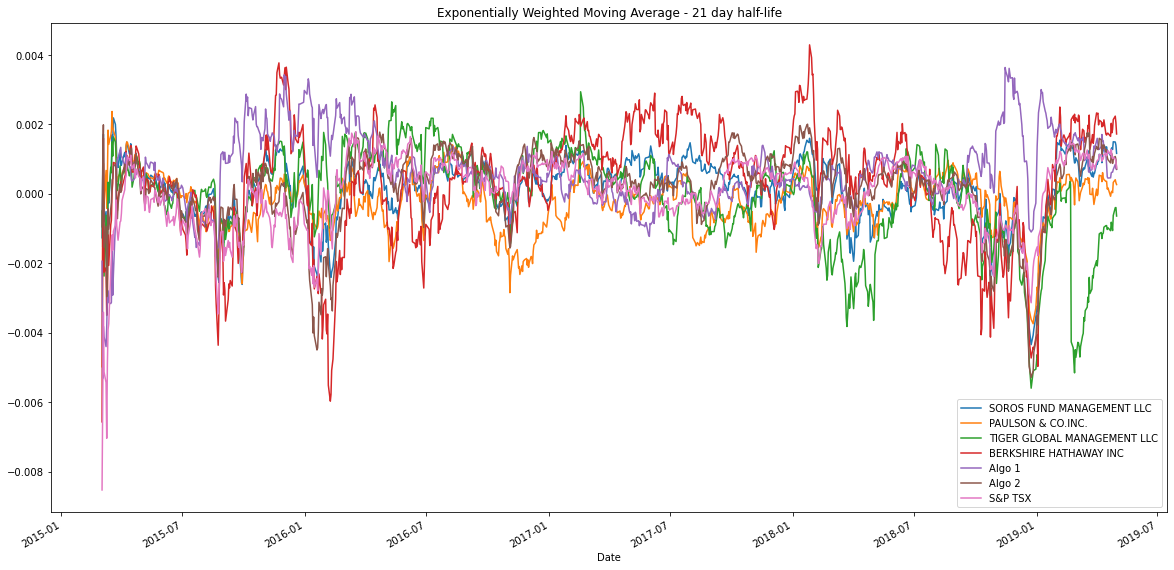

In [35]:
# Plot "ewm" rolling window
portfolio_returns_df_ewm.plot(figsize=(20, 10), title="Exponentially Weighted Moving Average - 21 day half-life")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [36]:
# Annualized Sharpe Ratios
ann_sharpe_ratios = (portfolio_returns_df.mean() * 252) / ann_std
ann_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratio'}>

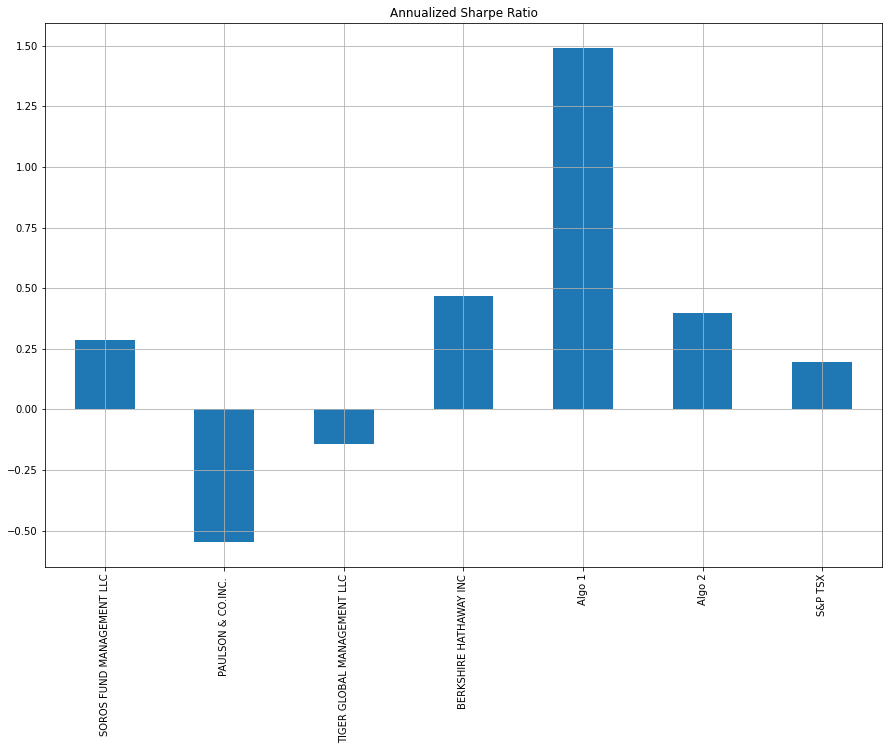

In [37]:
# Visualize the sharpe ratios as a bar plot
ann_sharpe_ratios.plot.bar(figsize=(15, 10), title="Annualized Sharpe Ratio", grid=True)

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Answer : Algo 1 portfolio has outperformed others in terms of its risk vs reward ratio. Algo 2 is slightly behind the Berkshire Hathaway portfolio in terms of risk to reward. Paulson & CO INC and Tiger Global Management LLC were the worst performing.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this exercise I have used 3 stocks - Google, Microsoft and Apple for the period Jan 2017 to Dec 2021


In [38]:
# Reading data from 1st stock - Apple
aapl_path = Path("Resources/aapl.csv")
aapl_df = pd.read_csv(aapl_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

#Sorting index by ascending and manually verifying that index has been sorted
aapl_df.sort_index(ascending=True, inplace=True) #
aapl_df.head()


Close
Date             
2017-01-03  29.04
2017-01-04  29.01
2017-01-05  29.15
2017-01-06  29.48
2017-01-09  29.75

In [39]:
# Reading data from 2nd stock - Google
goog_path = Path("Resources/goog.csv")
goog_df = pd.read_csv(goog_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

#Sorting index by ascending and manually verifying that index has been sorted
goog_df.sort_index(ascending=True, inplace=True)
goog_df.head()

Close
Date              
2017-01-03  786.14
2017-01-04  786.90
2017-01-05  794.02
2017-01-06  806.15
2017-01-09  806.65

In [40]:
# Reading data from 3rd stock - Microsoft
msft_path = Path("Resources/msft.csv")
msft_df = pd.read_csv(msft_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

#Sorting index by ascending and manually verifying that index has been sorted
msft_df.sort_index(ascending=True, inplace=True)
msft_df.head()

Close
Date             
2017-01-03  62.58
2017-01-04  62.30
2017-01-05  62.30
2017-01-06  62.84
2017-01-09  62.64

In [41]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([aapl_df, goog_df, msft_df], axis="columns", join="inner")
custom_portfolio.head()


Close   Close  Close
Date                            
2017-01-03  29.04  786.14  62.58
2017-01-04  29.01  786.90  62.30
2017-01-05  29.15  794.02  62.30
2017-01-06  29.48  806.15  62.84
2017-01-09  29.75  806.65  62.64

In [42]:
# Reset Date index
custom_portfolio.reset_index()


Date   Close    Close   Close
0    2017-01-03   29.04   786.14   62.58
1    2017-01-04   29.01   786.90   62.30
2    2017-01-05   29.15   794.02   62.30
3    2017-01-06   29.48   806.15   62.84
4    2017-01-09   29.75   806.65   62.64
...         ...     ...      ...     ...
1235 2021-11-29  160.24  2922.28  336.63
1236 2021-11-30  165.30  2849.04  330.59
1237 2021-12-01  164.77  2832.36  330.08
1238 2021-12-02  163.76  2875.53  329.49
1239 2021-12-03  161.84  2850.41  323.01

[1240 rows x 4 columns]

In [43]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio.columns = (["AAPL", "GOOG", "MSFT"])
custom_portfolio.head()


AAPL    GOOG   MSFT
Date                            
2017-01-03  29.04  786.14  62.58
2017-01-04  29.01  786.90  62.30
2017-01-05  29.15  794.02  62.30
2017-01-06  29.48  806.15  62.84
2017-01-09  29.75  806.65  62.64

In [44]:
# Calculate daily returns
custom_portfolio_dailyreturn = custom_portfolio.pct_change()

# Drop NAs
custom_portfolio_dailyreturn.dropna(inplace=True)
custom_portfolio_dailyreturn.isnull().sum()

# Display sample data
custom_portfolio_dailyreturn.head()

AAPL      GOOG      MSFT
Date                                    
2017-01-04 -0.001033  0.000967 -0.004474
2017-01-05  0.004826  0.009048  0.000000
2017-01-06  0.011321  0.015277  0.008668
2017-01-09  0.009159  0.000620 -0.003183
2017-01-10  0.001008 -0.002306 -0.000319

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_return = custom_portfolio_dailyreturn.dot(weights)

# Display sample data
custom_portfolio_return.head()

Date
2017-01-04   -0.001514
2017-01-05    0.004625
2017-01-06    0.011755
2017-01-09    0.002199
2017-01-10   -0.000539
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame
total_returns = pd.concat([portfolio_returns_df, custom_portfolio_return], axis="columns", join="inner")

# Adding column name for Custom Portfolio
total_returns.columns = (["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P TSX", "Custom Portfolio"])
total_returns

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
Date                                                       
2017-01-04                   0.011581           0.007029   
2017-01-05                   0.003079           0.004107   
2017-01-06                   0.003561          -0.013250   
2017-01-09                  -0.000458           0.002007   
2017-01-10                  -0.001490           0.000394   
...                               ...                ...   
2019-04-25                  -0.000285          -0.001291   
2019-04-26                   0.008149           0.009162   
2019-04-29                   0.001254           0.002719   
2019-04-30                  -0.001295          -0.002211   
2019-05-01                  -0.005847          -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2017-01-04                    -0.001011                0.012204  0.012510   
2017-01-05                    -0.004264                0.016092 -0.003955   
2017-01-06                    -0.001213                0.005667 -0.000364   
2017-01-09                    -0.004540               -0.002642  0.002775   
2017-01-10                    -0.000718                0.010586  0.007669   
...                                 ...                     ...       ...   
2019-04-25                    -0.005153                0.004848  0.000682   
2019-04-26                     0.012355                0.010434  0.002981   
2019-04-29                     0.006251                0.005223  0.005208   
2019-04-30                    -0.000259               -0.003702 -0.002944   
2019-05-01                    -0.007936               -0.007833  0.000094   

              Algo 2   S&P TSX  Custom Portfolio  
Date                                              
2017-01-04  0.014701  0.007383         -0.001514  
2017-01-05 -0.001872  0.004500          0.004625  
2017-01-06  0.000051 -0.005808          0.011755  
2017-01-09 -0.006277 -0.006911          0.002199  
2017-01-10  0.006618  0.002426         -0.000539  
...              ...       ...               ...  
2019-04-25 -0.007247 -0.000628          0.009991  
2019-04-26  0.005256  0.002254          0.002654  
2019-04-29  0.002829 -0.000788          0.004184  
2019-04-30 -0.001570 -0.001183         -0.029910  
2019-05-01 -0.007358 -0.004703          0.003681  

[574 rows x 8 columns]

In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
Custom Portfolio               0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`
new_ann_std = total_returns.std() * np.sqrt(252)
new_ann_std

SOROS FUND MANAGEMENT LLC      0.121924
PAULSON & CO.INC.              0.106148
TIGER GLOBAL MANAGEMENT LLC    0.187323
BERKSHIRE HATHAWAY INC         0.194911
Algo 1                         0.105662
Algo 2                         0.118886
S&P TSX                        0.088954
Custom Portfolio               0.202697
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Day Standard Deviation'}, xlabel='Date', ylabel='Rolling STD'>

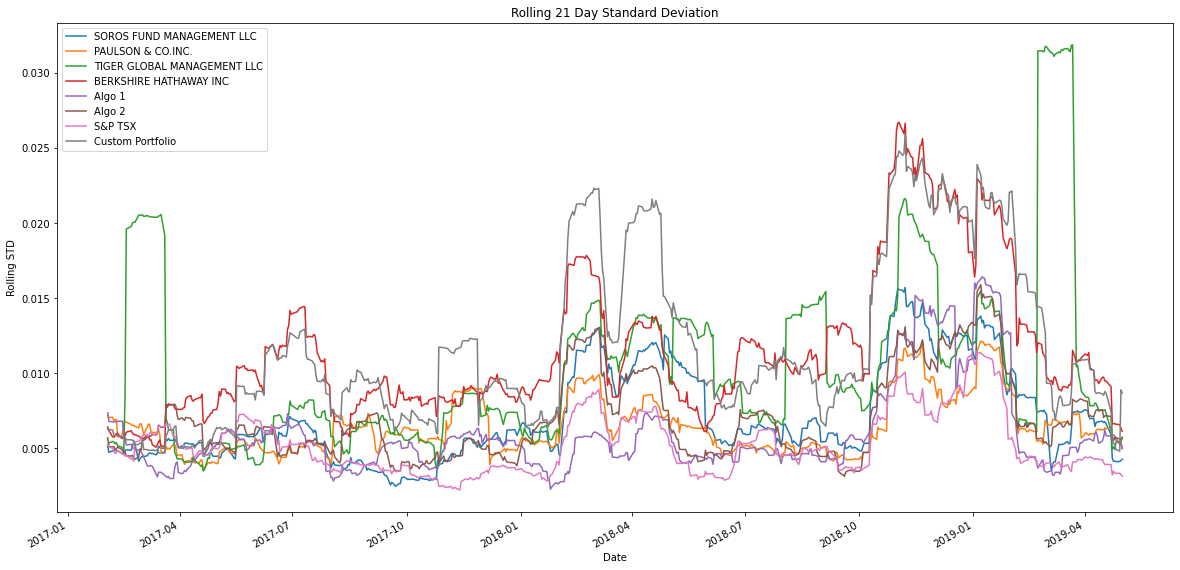

In [49]:
# Calculate rolling standard deviation
total_returns_df_21 = total_returns.rolling(window=21).std()
total_returns_df_21.tail()

# Plot rolling standard deviation
total_returns_df_21.plot(figsize=(20,10), title = "Rolling 21 Day Standard Deviation", ylabel = "Rolling STD")




### Calculate and plot the correlation

In [50]:
# Calculate and plot the correlation
correlation = total_returns.corr()
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
SOROS FUND MANAGEMENT LLC                     1.000000           0.676258   
PAULSON & CO.INC.                             0.676258           1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.481812           0.417147   
BERKSHIRE HATHAWAY INC                        0.750479           0.554358   
Algo 1                                        0.258004           0.268970   
Algo 2                                        0.793306           0.711971   
S&P TSX                                       0.629754           0.526272   
Custom Portfolio                              0.652058           0.506673   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.481812   
PAULSON & CO.INC.                               0.417147   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.337848   
Algo 1                                          0.079575   
Algo 2                                          0.427083   
S&P TSX                                         0.354124   
Custom Portfolio                                0.384004   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.750479  0.258004  0.793306   
PAULSON & CO.INC.                          0.554358  0.268970  0.711971   
TIGER GLOBAL MANAGEMENT LLC                0.337848  0.079575  0.427083   
BERKSHIRE HATHAWAY INC                     1.000000  0.222786  0.730203   
Algo 1                                     0.222786  1.000000  0.284497   
Algo 2                                     0.730203  0.284497  1.000000   
S&P TSX                                    0.588969  0.260889  0.713695   
Custom Portfolio                           0.790397  0.187634  0.688627   

                              S&P TSX  Custom Portfolio  
SOROS FUND MANAGEMENT LLC    0.629754          0.652058  
PAULSON & CO.INC.            0.526272          0.506673  
TIGER GLOBAL MANAGEMENT LLC  0.354124          0.384004  
BERKSHIRE HATHAWAY INC       0.588969          0.790397  
Algo 1                       0.260889          0.187634  
Algo 2                       0.713695          0.688627  
S&P TSX                      1.000000          0.565515  
Custom Portfolio             0.565515          1.000000

<AxesSubplot:>

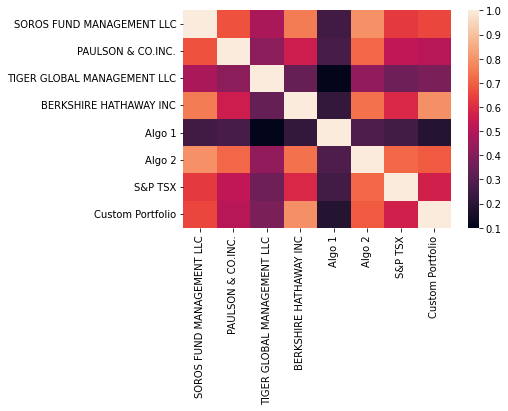

In [51]:
# Use seaborn to plot a heatmap of the correlation
sns.heatmap(correlation, vmin=0.1, vmax=1)

## Analysis:
Reviewing the correlation heatmap, the portfolios that most closesely mimic the Custom Portfolio are Berkshire Hathaway Inch and Algo 2

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio vs S&P TSX'}, xlabel='Date'>

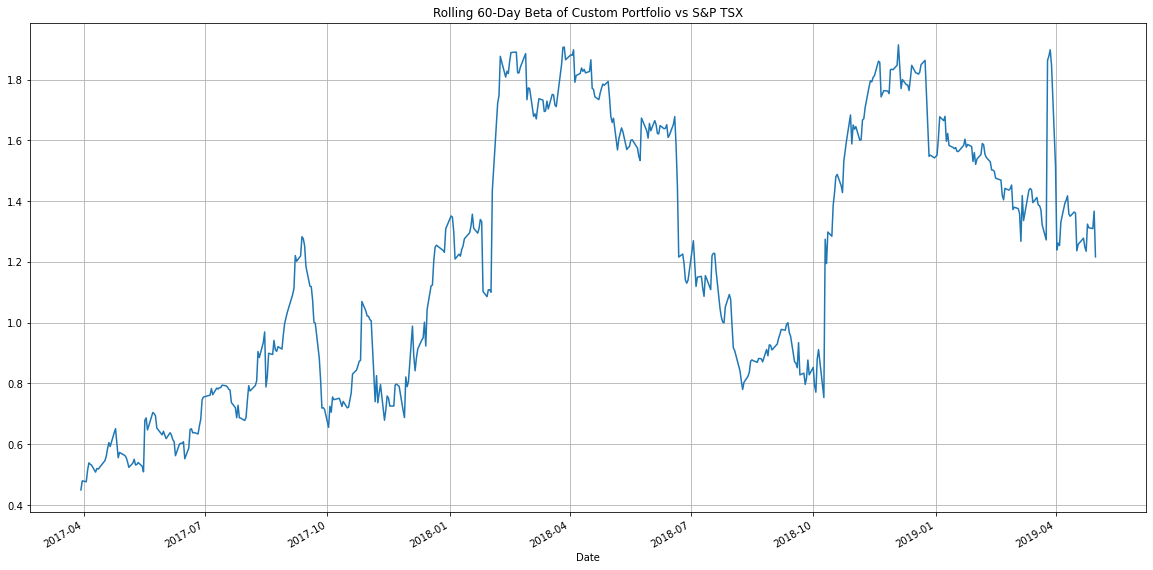

In [59]:
# Calculate covariance of Custom Portfolio vs. S&P 60TSX
custom_covariance = total_returns["Custom Portfolio"].cov(total_returns["S&P TSX"])

# Calculate 60-day rolling  covariance of Custom Portfolio vs. S&P 60TSX
custom_60day_covariance = total_returns["Custom Portfolio"].rolling(window=60).cov(total_returns["S&P TSX"])

# Calculate variance of Custom Portfolio vs. S&P 60TSX
custom_variance = total_returns["Custom Portfolio"].var

# Calculate 60-day rolling  variance of Custom Portfolio vs. S&P 60TSX
custom_60day_variance = total_returns["Custom Portfolio"].rolling(window=60).var

# Calculate variance of S&P TSX
sp_variance1 = total_returns["S&P TSX"].var()

# Calculate 60-day rolling variance of S&P TSX
sp_rolling_variance1 = total_returns["S&P TSX"].rolling(window=60).var()

# Computing beta and 60-day rolling beta of Custom Portfolio
custom_beta = custom_covariance / sp_variance1
custom_rolling_beta = custom_60day_covariance / sp_rolling_variance1

# Plot the 60-day rolling beta
custom_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Custom Portfolio vs S&P TSX', grid=True)




### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Calculate Annualized Sharpe Ratios
new_ann_sharpe_ratios = (total_returns.mean() * 252) / new_ann_std
new_ann_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.490831
PAULSON & CO.INC.             -0.475265
TIGER GLOBAL MANAGEMENT LLC   -0.907269
BERKSHIRE HATHAWAY INC         1.073710
Algo 1                         1.299763
Algo 2                         0.572888
S&P TSX                        0.338120
Custom Portfolio               1.192529
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

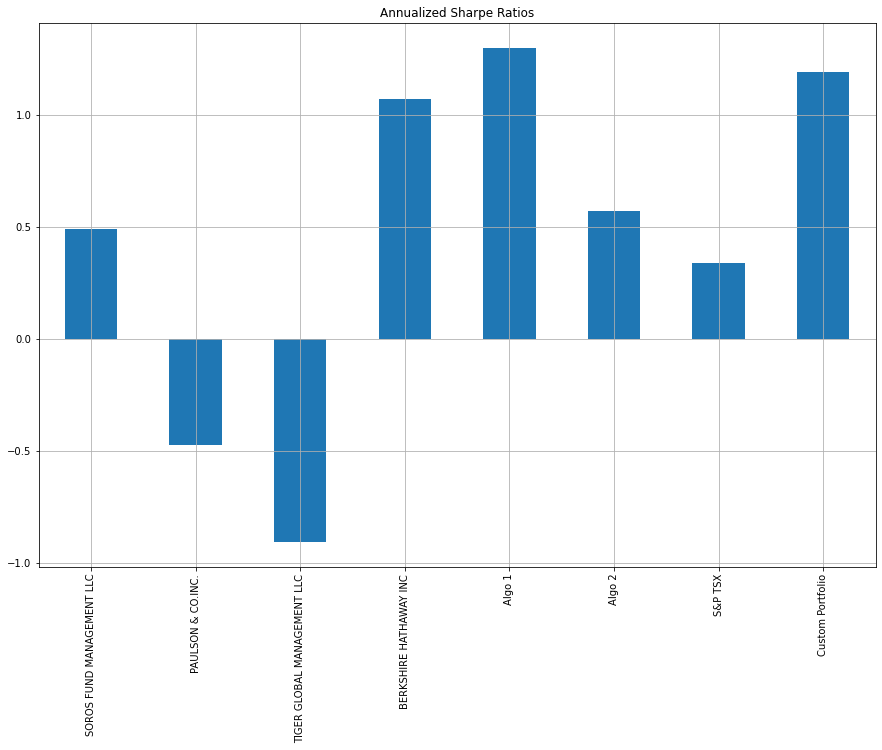

In [54]:
# Visualize the sharpe ratios as a bar plot
new_ann_sharpe_ratios.plot.bar(figsize=(15,10), grid=True, title = "Annualized Sharpe Ratios")

In [55]:
#Reviewing the summary of key elements of Total Returns
total_returns.describe()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
count                 574.000000         574.000000   
mean                    0.000237          -0.000200   
std                     0.007681           0.006687   
min                    -0.032711          -0.032099   
25%                    -0.003067          -0.003963   
50%                     0.000669           0.000000   
75%                     0.004427           0.003681   
max                     0.029881           0.027032   

       TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC      Algo 1  \
count                   574.000000              574.000000  574.000000   
mean                     -0.000674                0.000830    0.000545   
std                       0.011800                0.012278    0.006656   
min                      -0.139820               -0.053816   -0.026095   
25%                      -0.005246               -0.004583   -0.002982   
50%                       0.000046                0.001115    0.000035   
75%                       0.004975                0.007697    0.003451   
max                       0.080705                0.061341    0.050735   

           Algo 2     S&P TSX  Custom Portfolio  
count  574.000000  574.000000        574.000000  
mean     0.000270    0.000119          0.000959  
std      0.007489    0.005604          0.012769  
min     -0.031953   -0.024602         -0.054939  
25%     -0.003161   -0.002840         -0.003957  
50%      0.000730    0.000563          0.001640  
75%      0.004832    0.003840          0.007067  
max      0.030509    0.027940          0.051321

### How does your portfolio do?

Write your answer here!

## Custom Portfolio Analysis:

Though the Algo 1 Portfolio  outperformed others in terms of its risk vs reward ratio, The Custom Portfolio is slightly behind and has the second highest annualized sharpe ratio.

In terms of annualized standard deviation, the Custom Portfolio had the highest annualized standard deviation at 0.202697, followed closely behind by Berkshire Hathaway at 0.194911, which signifies that it is more volatile than the other portfolios.
